## Study of dataset 'Sales of summer clothes in E-commerce Wish' from Kaggle

The dataset 'Sales of summer clothes in E-commerce Wish' is from Kaggle. The data comes from the Wish platform. The following study will focus on the factor that affect the sales volume.

#### Download Dataset

Connect to the Kaggle to download the dataset.

In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
api.dataset_download_files('jmmvutu/summer-products-and-sales-in-ecommerce-wish')

Unzip download zip file.

In [32]:
import zipfile
with zipfile.ZipFile("summer-products-and-sales-in-ecommerce-wish.zip") as zip_ref:
    zip_ref.extractall()


Dataset contains three files. File 'summer-products-with-rating-and-performance_2020-08.csv' was imported.

In [155]:
import pandas as pd
df = pd.read_csv("summer-products-with-rating-and-performance_2020-08.csv")
df

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",navyblue,S,50,Livraison standard,2,0,41,50,NaN,NaN,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summe

#### Descriptive Statistics

The datasets contains 43 columns and 1573 rows. About products, it includes the retail price, price, units sold and so on. The 'units sold' column is a categorical variable (not continuous) that categories units sold into different bins of sold units.  Each products consist of customer rating and the count of each rating was already gathered in columns. Merchant can purchase ad boosts to increase exposure which column 'uses_ad_boosts' indicate merchant activate this feature or not. Product color and size was also included. Wish platform will show their recommendation in urgency text which recorded in column 'urgency_text'. The information of merchant and the origin of products are also included.

The columns retail_price, price, units_sold, uses_ad_boosts, rating, product_color, has_urgency_banner, origin_country and merchant_rating are selected for the following study.

In [156]:
df = df[["product_id", "retail_price", "price", "units_sold", "uses_ad_boosts", "rating", \
    "has_urgency_banner", "origin_country", "merchant_rating"]]
df

,product_id,retail_price,price,units_sold,uses_ad_boosts,rating,has_urgency_banner,origin_country,merchant_rating
0,5e9ae51d43d6a96e303acdb0,14,16.00,100,0,3.76,1.0,CN,4.128521
1,58940d436a0d3d5da4e95a38,22,8.00,20000,1,3.45,1.0,CN,3.899673
2,5ea10e2c617580260d55310a,43,8.00,100,0,3.57,1.0,CN,3.989831
3,5cedf17ad1d44c52c59e4aca,8,8.00,5000,1,4.03,NaN,CN,4.020435
4,5ebf5819ebac372b070b0e70,3,2.72,100,1,3.10,1.0,CN,4.001588
...,...,...,...,...,...,...,...,...,...
1568,5d5fadc99febd9356cbc52ee,9,6.00,10000,1,4.08,NaN,CN,4.224605
1569,5eccd22b4497b86fd48f16b4,56,2.00,100,1,3.07,1.0,CN,3.696054
1570,5e74be96034d613d42b52dfe,19,5.00,100,0,3.71,NaN,CN,3.961905
1571,5eda07ab0e295c2097c36590,11,13.00,100,0,2.50,NaN,CN,3.774194


In [157]:
df.describe()

,retail_price,price,units_sold,uses_ad_boosts,rating,has_urgency_banner,merchant_rating
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1573.000000
mean,23.288620,8.325372,4339.005086,0.432931,3.820896,1.0,4.032345
std,30.357863,3.932030,9356.539302,0.495639,0.515374,0.0,0.204768
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.0,2.333333
25%,7.000000,5.810000,100.000000,0.000000,3.550000,1.0,3.917353
50%,10.000000,8.000000,1000.000000,0.000000,3.850000,1.0,4.040650
75%,26.000000,11.000000,5000.000000,1.000000,4.110000,1.0,4.161797
max,252.000000,49.000000,100000.000000,1.000000,5.000000,1.0,5.000000


### Data Clean Up and Manipulation

There are data entry error that the price is higher than the retail price which will be eliminated. 

In [158]:
df = df.loc[df.price <= df.retail_price]
df

,product_id,retail_price,price,units_sold,uses_ad_boosts,rating,has_urgency_banner,origin_country,merchant_rating
1,58940d436a0d3d5da4e95a38,22,8.00,20000,1,3.45,1.0,CN,3.899673
2,5ea10e2c617580260d55310a,43,8.00,100,0,3.57,1.0,CN,3.989831
3,5cedf17ad1d44c52c59e4aca,8,8.00,5000,1,4.03,NaN,CN,4.020435
4,5ebf5819ebac372b070b0e70,3,2.72,100,1,3.10,1.0,CN,4.001588
5,5ec645bafd107a02279c8c54,9,3.92,10,0,5.00,NaN,CN,3.507692
...,...,...,...,...,...,...,...,...,...
1565,5e8f0165e815903d022a3c7c,8,3.00,100,1,3.79,1.0,CN,3.987990
1566,5d1060d39ed281190dfcec91,134,11.00,100,1,3.54,NaN,CN,4.071651
1568,5d5fadc99febd9356cbc52ee,9,6.00,10000,1,4.08,NaN,CN,4.224605
1569,5eccd22b4497b86fd48f16b4,56,2.00,100,1,3.07,1.0,CN,3.696054


Add column contains the discount percentage which equal to (retail_price - price) / retail_price * 100.

In [159]:
df["percent_discount"] = (df.retail_price - df.price) / df.retail_price * 100 
df

,product_id,retail_price,price,units_sold,uses_ad_boosts,rating,has_urgency_banner,origin_country,merchant_rating,percent_discount
1,58940d436a0d3d5da4e95a38,22,8.00,20000,1,3.45,1.0,CN,3.899673,63.636364
2,5ea10e2c617580260d55310a,43,8.00,100,0,3.57,1.0,CN,3.989831,81.395349
3,5cedf17ad1d44c52c59e4aca,8,8.00,5000,1,4.03,NaN,CN,4.020435,0.000000
4,5ebf5819ebac372b070b0e70,3,2.72,100,1,3.10,1.0,CN,4.001588,9.333333
5,5ec645bafd107a02279c8c54,9,3.92,10,0,5.00,NaN,CN,3.507692,56.444444
...,...,...,...,...,...,...,...,...,...,...
1565,5e8f0165e815903d022a3c7c,8,3.00,100,1,3.79,1.0,CN,3.987990,62.500000
1566,5d1060d39ed281190dfcec91,134,11.00,100,1,3.54,NaN,CN,4.071651,91.791045
1568,5d5fadc99febd9356cbc52ee,9,6.00,10000,1,4.08,NaN,CN,4.224605,33.333333
1569,5eccd22b4497b86fd48f16b4,56,2.00,100,1,3.07,1.0,CN,3.696054,96.428571


Convert units_sold to categorical

In [160]:
df['units_sold'] = pd.cut(df.units_sold, bins = [0, 9, 49, 99, 999, 4999, 9999, 19999, 49999, 1000000], \
      labels = ["<10", "10", "50", "100", "1000", "5000", "10000", "20000", "50000"])
df

,product_id,retail_price,price,units_sold,uses_ad_boosts,rating,has_urgency_banner,origin_country,merchant_rating,percent_discount
1,58940d436a0d3d5da4e95a38,22,8.00,20000,1,3.45,1.0,CN,3.899673,63.636364
2,5ea10e2c617580260d55310a,43,8.00,100,0,3.57,1.0,CN,3.989831,81.395349
3,5cedf17ad1d44c52c59e4aca,8,8.00,5000,1,4.03,NaN,CN,4.020435,0.000000
4,5ebf5819ebac372b070b0e70,3,2.72,100,1,3.10,1.0,CN,4.001588,9.333333
5,5ec645bafd107a02279c8c54,9,3.92,10,0,5.00,NaN,CN,3.507692,56.444444
...,...,...,...,...,...,...,...,...,...,...
1565,5e8f0165e815903d022a3c7c,8,3.00,100,1,3.79,1.0,CN,3.987990,62.500000
1566,5d1060d39ed281190dfcec91,134,11.00,100,1,3.54,NaN,CN,4.071651,91.791045
1568,5d5fadc99febd9356cbc52ee,9,6.00,10000,1,4.08,NaN,CN,4.224605,33.333333
1569,5eccd22b4497b86fd48f16b4,56,2.00,100,1,3.07,1.0,CN,3.696054,96.428571


Convert the uses_ad_boosts column to categorical variable.

In [161]:
df["uses_ad_boosts"] = df.uses_ad_boosts.astype('category')
df

,product_id,retail_price,price,units_sold,uses_ad_boosts,rating,has_urgency_banner,origin_country,merchant_rating,percent_discount
1,58940d436a0d3d5da4e95a38,22,8.00,20000,1,3.45,1.0,CN,3.899673,63.636364
2,5ea10e2c617580260d55310a,43,8.00,100,0,3.57,1.0,CN,3.989831,81.395349
3,5cedf17ad1d44c52c59e4aca,8,8.00,5000,1,4.03,NaN,CN,4.020435,0.000000
4,5ebf5819ebac372b070b0e70,3,2.72,100,1,3.10,1.0,CN,4.001588,9.333333
5,5ec645bafd107a02279c8c54,9,3.92,10,0,5.00,NaN,CN,3.507692,56.444444
...,...,...,...,...,...,...,...,...,...,...
1565,5e8f0165e815903d022a3c7c,8,3.00,100,1,3.79,1.0,CN,3.987990,62.500000
1566,5d1060d39ed281190dfcec91,134,11.00,100,1,3.54,NaN,CN,4.071651,91.791045
1568,5d5fadc99febd9356cbc52ee,9,6.00,10000,1,4.08,NaN,CN,4.224605,33.333333
1569,5eccd22b4497b86fd48f16b4,56,2.00,100,1,3.07,1.0,CN,3.696054,96.428571


Convert the NaN value to 0 in has_urgency_banner.

In [169]:
df["has_urgency_banner"] = df.has_urgency_banner.fillna(0).astype('category')
df

,product_id,retail_price,price,units_sold,uses_ad_boosts,rating,has_urgency_banner,origin_country,merchant_rating,percent_discount
1,58940d436a0d3d5da4e95a38,22,8.00,20000,1,3.45,1.0,CN,3.899673,63.636364
2,5ea10e2c617580260d55310a,43,8.00,100,0,3.57,1.0,CN,3.989831,81.395349
3,5cedf17ad1d44c52c59e4aca,8,8.00,5000,1,4.03,0.0,CN,4.020435,0.000000
4,5ebf5819ebac372b070b0e70,3,2.72,100,1,3.10,1.0,CN,4.001588,9.333333
5,5ec645bafd107a02279c8c54,9,3.92,10,0,5.00,0.0,CN,3.507692,56.444444
...,...,...,...,...,...,...,...,...,...,...
1565,5e8f0165e815903d022a3c7c,8,3.00,100,1,3.79,1.0,CN,3.987990,62.500000
1566,5d1060d39ed281190dfcec91,134,11.00,100,1,3.54,0.0,CN,4.071651,91.791045
1568,5d5fadc99febd9356cbc52ee,9,6.00,10000,1,4.08,0.0,CN,4.224605,33.333333
1569,5eccd22b4497b86fd48f16b4,56,2.00,100,1,3.07,1.0,CN,3.696054,96.428571


Nan value found in product_color and origin_country columns which will be eliminated.

In [163]:
df.loc[df.isnull().any(axis=1)]

,product_id,retail_price,price,units_sold,uses_ad_boosts,rating,has_urgency_banner,origin_country,merchant_rating,percent_discount
56,5e81acbde187530740f207c6,10,1.00,100,0,3.56,1.0,NaN,3.837937,90.000000
180,5dde07c651fe4539f9c3ee70,4,3.78,1000,1,3.35,0.0,NaN,3.789601,5.500000
498,552f840fcea30816e52aabcf,13,7.00,50000,1,3.35,0.0,NaN,4.103760,46.153846
507,5d8d8f2e0c400f2f97671e30,11,1.85,100,0,3.90,0.0,NaN,3.837937,83.181818
632,5e44564413b8939de2f0a0f8,30,5.00,100,0,3.69,0.0,NaN,3.840025,83.333333
679,5e44564413b8939de2f0a0f8,30,5.00,100,0,3.69,1.0,NaN,3.840025,83.333333
802,5d82f19340367911da1b9ee7,4,3.68,100,0,3.71,0.0,NaN,3.789601,8.000000
921,5dafd1e7e580730831a8a64c,8,5.83,5000,0,3.99,0.0,NaN,3.837937,27.125000
943,57ccc65975aea72c65411bc6,26,9.00,10000,1,3.78,0.0,NaN,4.103760,65.384615
1147,5d8d8f2e0c400f2f97671e30,11,1.85,100,0,3.90,1.0,NaN,3.837937,83.181818


In [164]:
df = df.dropna()
df

,product_id,retail_price,price,units_sold,uses_ad_boosts,rating,has_urgency_banner,origin_country,merchant_rating,percent_discount
1,58940d436a0d3d5da4e95a38,22,8.00,20000,1,3.45,1.0,CN,3.899673,63.636364
2,5ea10e2c617580260d55310a,43,8.00,100,0,3.57,1.0,CN,3.989831,81.395349
3,5cedf17ad1d44c52c59e4aca,8,8.00,5000,1,4.03,0.0,CN,4.020435,0.000000
4,5ebf5819ebac372b070b0e70,3,2.72,100,1,3.10,1.0,CN,4.001588,9.333333
5,5ec645bafd107a02279c8c54,9,3.92,10,0,5.00,0.0,CN,3.507692,56.444444
...,...,...,...,...,...,...,...,...,...,...
1565,5e8f0165e815903d022a3c7c,8,3.00,100,1,3.79,1.0,CN,3.987990,62.500000
1566,5d1060d39ed281190dfcec91,134,11.00,100,1,3.54,0.0,CN,4.071651,91.791045
1568,5d5fadc99febd9356cbc52ee,9,6.00,10000,1,4.08,0.0,CN,4.224605,33.333333
1569,5eccd22b4497b86fd48f16b4,56,2.00,100,1,3.07,1.0,CN,3.696054,96.428571


### Data Visualization

The plot shows the median of price at each units_sold category are similar except the highest units_sold category '50000' mainly on lower price product. 

<AxesSubplot:xlabel='units_sold', ylabel='price'>

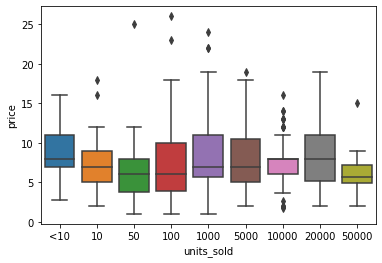

In [165]:
import seaborn as sns
sns.boxplot(data = df, x = "units_sold", y = "price")

The plot shows similar distribution between used ad boosts or not used which indicate the ad boost do not help much on units sold.

<AxesSubplot:xlabel='units_sold', ylabel='percent_ad_boosts'>

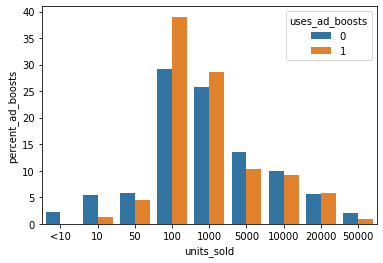

In [191]:
tmp = df.groupby(["uses_ad_boosts", "units_sold"])['product_id'].count().reset_index()
tmp['percent_ad_boosts'] = tmp.groupby('uses_ad_boosts')['product_id'].apply(lambda x: x / sum(x) * 100)
sns.barplot(data = tmp, x = "units_sold", y = "percent_ad_boosts", hue = 'uses_ad_boosts')

The plot shows the rating was more diverse in lower units_sold category.

<AxesSubplot:xlabel='units_sold', ylabel='rating'>

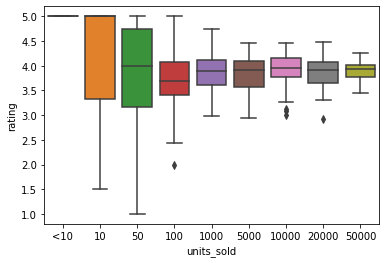

In [167]:
sns.boxplot(data = df, x = "units_sold", y = "rating")

The plot shows similar distribution between has_urgency_banner or not which indicate urgency banner do not help much on units sold.

<AxesSubplot:xlabel='units_sold', ylabel='percent_urgency_banner'>

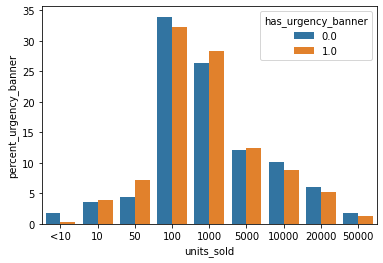

In [192]:
tmp = df.groupby(["has_urgency_banner", "units_sold"])['product_id'].count().reset_index()
tmp['percent_urgency_banner'] = tmp.groupby('has_urgency_banner')['product_id'].apply(lambda x: x / sum(x) * 100)
sns.barplot(data = tmp, x = "units_sold", y = "percent_urgency_banner", hue = 'has_urgency_banner')

The plot shows most product origin_country from CN.

<AxesSubplot:xlabel='units_sold', ylabel='Count'>

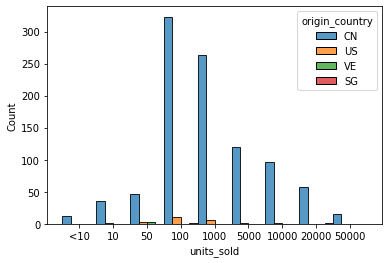

In [194]:
sns.histplot(data = df, x = "units_sold", hue = "origin_country", stat = "count", multiple = "dodge")

The plot shows high units_sold mostly related to merchant with high rating.

<AxesSubplot:xlabel='units_sold', ylabel='merchant_rating'>

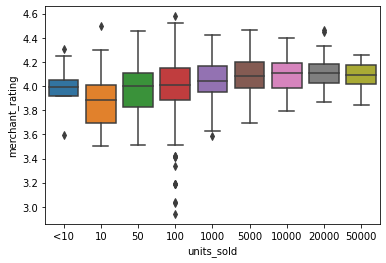

In [195]:
sns.boxplot(data = df, x = "units_sold", y = "merchant_rating")

The plot show high units_sold not just relate to high discount except category '50000'.

<AxesSubplot:xlabel='units_sold', ylabel='percent_discount'>

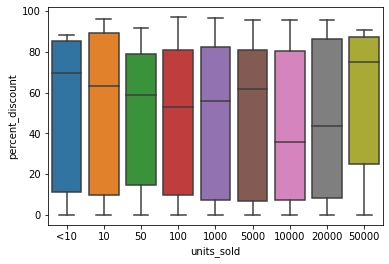

In [196]:
sns.boxplot(data = df, x = "units_sold", y = "percent_discount")

### Conclusion

The hypothesis of the study is customers are price sensitive but it didn't show this relationship. The ab boosts only have a limited effect on sales. The urgency text from Wish platform also provide not much help for the sales volume. The origin country is mainly from China which hard to conclude the effect of it to sales.

However, high sales volume product usually have high rating of product and the rating of merchant also high. And the discount also shows obvious effect on sales.